In [1]:
# do imports here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


I saved you some time by pre-downloading some data in .csv format from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). It is located at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

You don't even need to download it. You can open it directly with Pandas.

## Part I: Read Earthquake Data

We don't need any `groupby` to do part I

### 1) Use Pandas' read_csv function directly on this url to open it as a DataFrame
(Don't use any special options). Display the first few rows and the DataFrame info.

In [2]:
url = "http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv"
data = pd.read_csv(url)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
time         120108 non-null object
latitude     120108 non-null float64
longitude    120108 non-null float64
depth        120107 non-null float64
mag          120065 non-null float64
magType      120065 non-null object
nst          59688 non-null float64
gap          94935 non-null float64
dmin         85682 non-null float64
rms          119716 non-null float64
net          120108 non-null object
id           120108 non-null object
updated      120108 non-null object
place        120108 non-null object
type         120108 non-null object
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


You should have seen that the dates were not automatically parsed into datetime types.

### 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake id is used as the index

Verify that this worked using the `head` and `info` functions.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
time         120108 non-null object
latitude     120108 non-null float64
longitude    120108 non-null float64
depth        120107 non-null float64
mag          120065 non-null float64
magType      120065 non-null object
nst          59688 non-null float64
gap          94935 non-null float64
dmin         85682 non-null float64
rms          119716 non-null float64
net          120108 non-null object
id           120108 non-null object
updated      120108 non-null object
place        120108 non-null object
type         120108 non-null object
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


In [5]:
data = pd.read_csv(url,index_col="id",parse_dates=['time'] )

In [6]:
data.head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


### 3) Use `describe` to get the basic statistics of all the columns

Note the highest and lowest magnitude of earthquakes in the databse.

In [7]:
data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


### 4) Use `nlargest` to get the top 20 earthquakes by magnitude

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nlargest.html

In [8]:
data.nlargest(20,'mag')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


Examine the structure of the `place` column. The country information seems to be in there. How would you get it out?

### 5) Extract the country using Pandas [text data functions](https://pandas.pydata.org/pandas-docs/stable/text.html)

Add it as a new column to the dataframe.

In [9]:
country = data.place.str.split(',').str[1]

#series needs name attribute in order to join
country = country.rename('country')

data = data.join(country)
data.head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico


### 6) Display each unique value from the country column

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html

In [10]:
data.country.unique()

array([' Alaska', ' Nevada', ' Mexico', ' California',
       ' Papua New Guinea', ' New Zealand', ' Missouri', nan, ' Montana',
       ' British Virgin Islands', ' Washington', ' Oregon', ' Canada',
       ' Fiji', ' Antarctica', ' Chile', ' Utah', ' Indonesia',
       ' Solomon Islands', ' Micronesia', ' Oklahoma', ' Hawaii',
       ' Wyoming', ' Russia', ' Arizona', ' Philippines', ' Bolivia',
       ' Greece', ' Japan', ' Puerto Rico', ' Iran', ' Tonga',
       ' Wallis and Futuna', ' Colorado', ' Guam', ' CA', ' Idaho',
       ' Pakistan', ' Burma', ' China', ' Peru', ' Costa Rica',
       ' East Timor', ' Japan region', ' Northern Mariana Islands',
       ' El Salvador', ' Samoa', ' Taiwan', ' Arkansas',
       ' South Sandwich Islands', ' Colombia', ' Dominican Republic',
       ' Argentina', ' Texas', ' New Hampshire', ' Saint Helena',
       ' Tanzania', ' Vanuatu', ' Bosnia and Herzegovina', ' India',
       ' American Samoa', ' Tennessee', ' Kentucky', ' Serbia',
       ' Ni

### 7) Make a bar chart of the top 5 earthquake magnitudes vs country/state 

Text(0,0.5,'Magnitude')

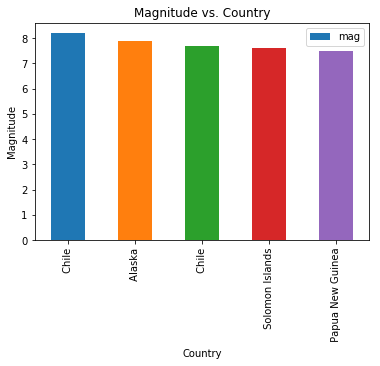

In [11]:
top5mag = data.nlargest(5,'mag')
top5mag
fig = top5mag.plot.bar(x='country',y='mag')
fig.set_title('Magnitude vs. Country')
fig.set_xlabel('Country')
fig.set_ylabel('Magnitude')


### 8) Create a filtered dataset that only has earthquakes of magnitude 4 or larger

In [21]:
dataM4 = data.loc[data['mag']>4]
print(dataM4.mag.describe())
dataM4.head()



count    16371.000000
mean         4.527287
std          0.377915
min          4.010000
25%          4.300000
50%          4.500000
75%          4.700000
max          8.200000
Name: mag, dtype: float64


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000s8ny,2014-09-01 11:41:09.540,64.6810,-17.4950,0.0,5.50,mww,NaN,49.00,1.646,0.7000,us,2014-11-29T00:09:24.000Z,"115km SSE of Akureyri, Iceland",earthquake,Iceland
usc000t79s,2014-12-16 10:45:24.490,-56.7439,-150.4989,0.0,5.30,mwc,NaN,29.00,26.455,0.7800,us,2015-03-04T21:55:06.040Z,Pacific-Antarctic Ridge,earthquake,NaN
nn00465678,2014-10-30 15:16:33.068,41.9104,-119.6185,0.0,4.10,ml,5.0,78.50,0.510,0.0942,nn,2015-03-20T18:42:36.437Z,"67km ESE of Lakeview, Oregon",earthquake,Oregon
nn00466104,2014-11-04 10:47:58.153,41.8817,-119.6130,0.0,4.05,ml,4.0,78.44,0.514,0.1148,nn,2015-01-20T09:03:16.040Z,"69km ESE of Lakeview, Oregon",earthquake,Oregon
usc000t5h3,2014-12-11 05:30:04.400,36.6368,20.9340,0.0,4.20,mb,NaN,NaN,NaN,1.6300,us,2015-03-04T21:54:58.040Z,"71km WSW of Methoni, Greece",earthquake,Greece


### 9) Make a histogram the distribution of the Earthquake magnitudes

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

Do one subplot for the filtered and one for the unfiltered dataset.
Use a Logarithmic scale. What sort of relationship do you see?

For earthquakes magnitude > 4, there is a 1-1 linear relationship between the magnitude of the earthquakes and their frequency. This means that for every M7 eathquake there will be 10 M6's, and so on. This is called the Gutenberg-Richter relationship, and if slope of this line is around -1, as seen here, it implies that the catalog is "complete". The fact that the first figure does not exhibit this relationship implies that small-magnitude earthquakes are systematically going unrecorded. Therefore, the catalog is not complete for magnitude<4. 

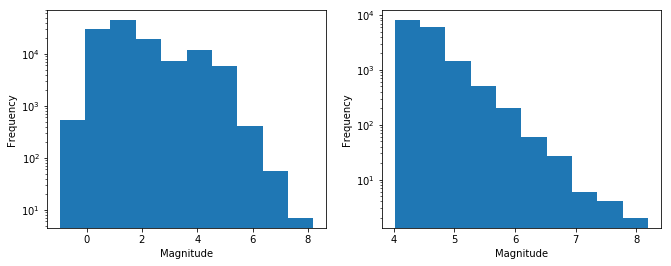

In [25]:
fig, axes = plt.subplots(figsize=(11,4), ncols=2)
ax0, ax1 = axes

bs = 10; #bin size

f1 = data['mag'].plot.hist(ax=ax0, bins=bs, log=True)
f2 = dataM4['mag'].plot.hist(ax=ax1, bins=bs, log=True)


f1.set_xlabel('Magnitude')
f2.set_xlabel('Magnitude');




### 11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude.

Do both the filtered and unfiltered datasets. Color it by magnitude. Make it pretty

What difference do you note between the filtered and unfiltered datasets?

Other than having more earthquakes than the filtered set, the two graphs look fairly similar. Subduction zones are where the largest magnitude earthquakes occur, and in those regions are many of the M<4 earthquakes as well. 

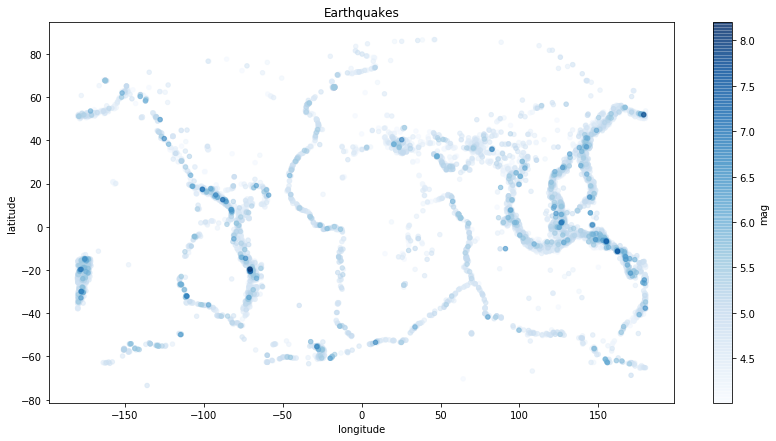

In [60]:
fig, ax = plt.subplots(figsize=(14,7))
dataM4 = dataM4.sort_values('mag')
magscale = np.abs(dataM4.mag)**2.5
dataM4.plot.scatter(ax=ax, x='longitude', y='latitude', c="mag", 
                    cmap="Blues", alpha=0.6)
ax.set_title('Earthquakes');

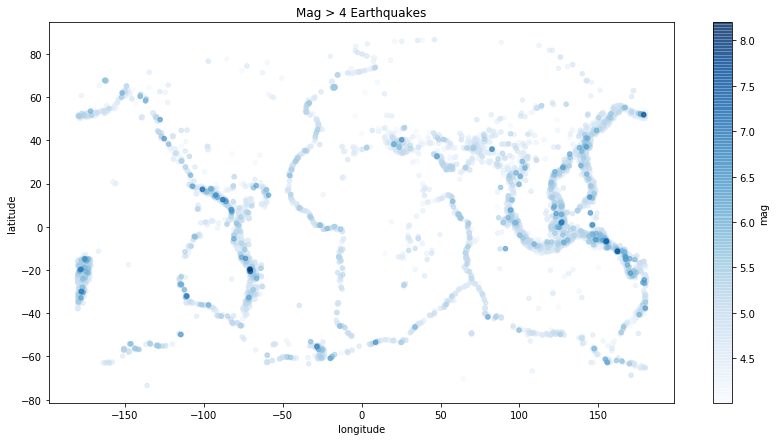

In [59]:
fig, ax = plt.subplots(figsize=(14,7))
dataM4 = dataM4.sort_values('mag')
magscale = np.abs(dataM4.mag)**2.5
dataM4.plot.scatter(ax=ax, x='longitude', y='latitude', c="mag", 
                    cmap="Blues", alpha=0.6)
ax.set_title('Mag > 4 Earthquakes');